# importing libraries


In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from fcmeans import FCM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# reading dataset

In [33]:
df=pd.read_csv("E:/Data/student-mat-pass-or-fail.csv")
df.head(5)
# df.iloc[:,0:15]
# df.iloc[:,15:29]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1


In [34]:
df.shape

(395, 30)

# applying Standardscaler( ) on some features

In [35]:
df = df.copy()
col_names  = ["age","Medu","Fedu","traveltime","studytime","absences","G1","G2","G3","famrel","freetime","goout","health","Walc","Dalc"]
features = df[col_names]
scaler = StandardScaler(copy=True,with_mean=True,with_std=True).fit(features.values)
features = scaler.transform(features.values)
df[col_names] = features


<IPython.core.display.Javascript object>

In [36]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
count,395.000000,395.000000,3.950000e+02,395.000000,395.000000,395.000000,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,...,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,395.000000
mean,0.883544,0.526582,1.411529e-15,0.777215,0.288608,0.896203,8.432074e-18,-1.264811e-16,-2.203582e-16,-2.709506e-16,...,1.028713e-16,-2.062345e-17,8.769357e-17,-3.091760e-17,1.169248e-16,1.914783e-17,-5.424634e-17,-1.262000e-16,-2.119261e-16,0.670886
std,0.321177,0.499926,1.001268e+00,0.416643,0.453690,0.305384,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,...,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,0.470487
min,0.000000,0.000000,-1.330954e+00,0.000000,0.000000,0.000000,-2.514630e+00,-2.320084e+00,-6.432495e-01,-1.235351e+00,...,-2.240828e+00,-1.896683e+00,-5.406987e-01,-1.003789e+00,-1.839649e+00,-7.142362e-01,-2.385787e+00,-2.851920e+00,-2.276226e+00,0.000000
25%,1.000000,0.000000,-5.462869e-01,1.000000,0.000000,1.000000,-6.853872e-01,-4.798568e-01,-6.432495e-01,-1.235351e+00,...,-2.360102e-01,-9.972953e-01,-5.406987e-01,-1.003789e+00,-3.992895e-01,-7.142362e-01,-8.774869e-01,-4.562264e-01,-5.278366e-01,0.000000
50%,1.000000,1.000000,2.383798e-01,1.000000,0.000000,1.000000,2.292342e-01,-4.798568e-01,-6.432495e-01,-4.228585e-02,...,-2.360102e-01,-9.790798e-02,-5.406987e-01,-2.263446e-01,3.208902e-01,-2.137958e-01,2.749306e-02,7.615005e-02,1.278095e-01,1.000000
75%,1.000000,1.000000,1.023046e+00,1.000000,1.000000,1.000000,1.143856e+00,4.402569e-01,7.922508e-01,-4.228585e-02,...,7.663987e-01,8.014793e-01,5.833854e-01,5.511000e-01,1.041070e+00,2.866447e-01,6.308130e-01,6.085265e-01,7.834555e-01,1.000000
max,1.000000,1.000000,4.161713e+00,1.000000,1.000000,1.000000,1.143856e+00,1.360371e+00,3.663251e+00,2.343844e+00,...,1.768808e+00,1.700867e+00,3.955638e+00,2.105989e+00,1.041070e+00,8.669022e+00,2.440773e+00,2.205656e+00,2.094748e+00,1.000000


In [37]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass          0
dtype: int64

# Declare feature vector and target variable

In [38]:
X=df.drop(columns=["pass"])
y=df["pass"]
y

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: pass, Length: 395, dtype: int64

#  PCA to reduce the number of dimensions so that we can visualize the results using a 2D Scatter plot

In [39]:
pca = PCA(2)
df = pca.fit_transform(X)
 
df.shape

(395, 2)

# Elbow Method to choose the best number of clusters

C:\Users\smart\Downloads\Programs\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


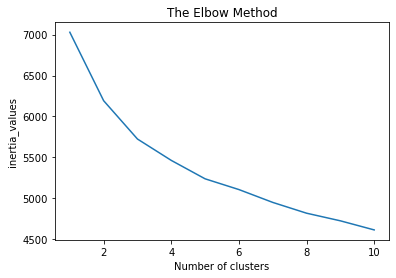

In [9]:
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 50, n_init = 10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia_values)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia_values')
plt.show()


# K-Means Model

In [40]:

kmeans = KMeans(n_clusters= 2,random_state=47)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
correct_labels = sum(y == label)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


KM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",KM_accuracy)



Result: 329 out of 395 samples were correctly labeled.
Accuracy_score : 83.29113924050633


# Visualization

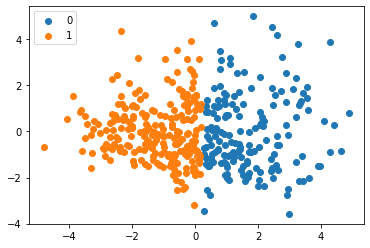

In [41]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

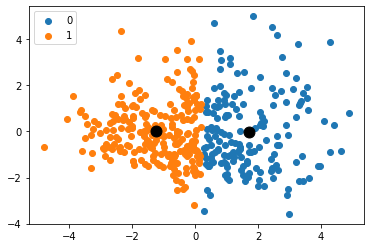

In [42]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 120, color = "black")
plt.legend()
plt.show()

# The Number of Samples belongs to each class

In [43]:
label=pd.DataFrame(label)
label.columns=["labels"]
label.value_counts()


labels
1         229
0         166
dtype: int64

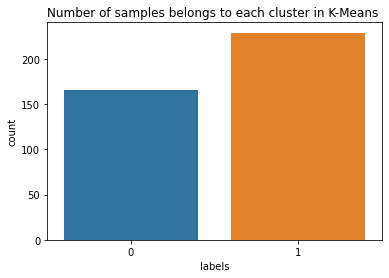

In [44]:
import seaborn as sns 
sns.countplot(data=label,x="labels").set(title='Number of samples belongs to each cluster in K-Means ')
plt.show()

# Calculating Details

In [15]:
print('KMeansModel centroids :\n \n ' ,kmeans.cluster_centers_)

KMeansModel centroids :
 
  [[ 1.7060788  -0.01441533]
 [-1.23672088  0.01044954]]


In [45]:
print('KMeansModel labels are :\n ' , kmeans.labels_)

KMeansModel labels are :
  [0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1
 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1
 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]


In [46]:
print('KMeansModel intertia is :' , kmeans.inertia_)

KMeansModel intertia is : 1308.2205390587249


# C-Means Model 

In [47]:
CM=FCM(n_clusters=2,random_state=0,max_iter=100,m=1.3)
CM.fit(X.to_numpy())
centers=CM.centers
pred_CM = CM.soft_predict(X.to_numpy()) #soft
pred_CM# Fuzzy values (membership function)







array([[0.75138148, 0.24861852],
       [0.87723279, 0.12276721],
       [0.78408871, 0.21591129],
       [0.09271703, 0.90728297],
       [0.55697463, 0.44302537],
       [0.05490999, 0.94509001],
       [0.26929928, 0.73070072],
       [0.64543809, 0.35456191],
       [0.09614072, 0.90385928],
       [0.11679304, 0.88320696],
       [0.31783291, 0.68216709],
       [0.41187221, 0.58812779],
       [0.0937736 , 0.9062264 ],
       [0.24835512, 0.75164488],
       [0.12887468, 0.87112532],
       [0.09146218, 0.90853782],
       [0.0672058 , 0.9327942 ],
       [0.5026859 , 0.4973141 ],
       [0.84190664, 0.15809336],
       [0.49132796, 0.50867204],
       [0.10060245, 0.89939755],
       [0.10876209, 0.89123791],
       [0.13027454, 0.86972546],
       [0.45466776, 0.54533224],
       [0.3628873 , 0.6371127 ],
       [0.72434634, 0.27565366],
       [0.29091913, 0.70908087],
       [0.26214857, 0.73785143],
       [0.18249843, 0.81750157],
       [0.54210641, 0.45789359],
       [0.

# applying alpha _cut

In [48]:
def alph_cut(alpha,y_fuzzy):
  label=[]
  memberships_length=len(y_fuzzy)
  for i in range(memberships_length):
    if (alpha<=y_fuzzy[i][0]):
      label.append(0)
    else:
      label.append(1)
  return label


# at alpha_cut = .2

In [49]:
predictied=alph_cut(.2,pred_CM)
correct_labels = sum(y == predictied)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


CM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",CM_accuracy)


Result: 222 out of 395 samples were correctly labeled.
Accuracy_score : 56.20253164556962


# at alpha_cut = .3

In [50]:
predictied=alph_cut(.3,pred_CM)

correct_labels = sum(y == predictied)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


CM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",CM_accuracy)

Result: 262 out of 395 samples were correctly labeled.
Accuracy_score : 66.32911392405063


# at alpha_cut = .4

In [51]:
predictied=alph_cut(.4,pred_CM)

correct_labels = sum(y == predictied)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


CM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",CM_accuracy)

Result: 286 out of 395 samples were correctly labeled.
Accuracy_score : 72.40506329113924


# at alpha_cut = .6

In [52]:
predictied=alph_cut(.6,pred_CM)

correct_labels = sum(y == predictied)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


CM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",CM_accuracy)

Result: 326 out of 395 samples were correctly labeled.
Accuracy_score : 82.53164556962025


# at alpha_cut = .8

In [53]:
predictied=alph_cut(.8,pred_CM)

correct_labels = sum(y == predictied)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


CM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",CM_accuracy)

Result: 312 out of 395 samples were correctly labeled.
Accuracy_score : 78.9873417721519


# at alpha_cut = .5

In [56]:
predictied=alph_cut(.7,pred_CM)

correct_labels = sum(y == predictied)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


CM_accuracy=correct_labels/float(y.size)*100

print("Accuracy_score :",CM_accuracy)
n=alph_cut(.5,pred_CM)
n=pd.DataFrame(n)
n.columns=["labels"]
n.value_counts()

Result: 333 out of 395 samples were correctly labeled.
Accuracy_score : 84.30379746835443


labels
1         213
0         182
dtype: int64

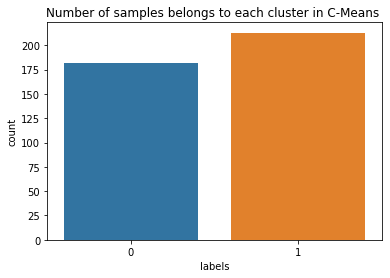

In [57]:
import seaborn as sns 
sns.countplot(data=n,x="labels").set(title='Number of samples belongs to each cluster in C-Means ')
plt.show()

# Support Vector Machine Model 

In [58]:
#Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=47)
               

In [59]:
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

<IPython.core.display.Javascript object>

In [60]:
X_train

array([[ 0.35805744,  0.91986621, -0.53859356, ..., -0.82931209,
        -0.17125129, -0.31725632],
       [ 0.35805744,  0.91986621, -1.31985015, ..., -0.82931209,
        -0.69391419, -0.98551962],
       [ 0.35805744,  0.91986621,  1.02391962, ...,  0.06188896,
        -0.17125129, -0.09450188],
       ...,
       [ 0.35805744, -1.08711461,  0.24266303, ...,  0.06188896,
        -0.17125129, -0.09450188],
       [-2.79284801, -1.08711461,  2.5864328 , ..., -0.53224507,
        -0.43258274, -0.31725632],
       [ 0.35805744,  0.91986621, -1.31985015, ...,  0.06188896,
        -2.78456579, -2.32204622]])

In [61]:

# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=47, kernel='linear') 

# Fit the model
svc.fit(X_train, y_train)

# Make the predictions
y_predict = svc.predict(X_test)

# Measure the performance
SVM_accuracy=accuracy_score(y_test, y_predict)*100
print("Accuracy score : ",SVM_accuracy)

Accuracy score :  94.65648854961832


# Conclusion

In [62]:
Models=["K-Means","Fuzzy C-Means","SVM"]
model_data = [KM_accuracy,CM_accuracy,SVM_accuracy]
cols = ["Accuracy_score"]
compare=pd.DataFrame(data=model_data , index= Models , columns= cols)
compare.sort_values(ascending= False , by = ['Accuracy_score'])

,Accuracy_score
SVM,94.656489
Fuzzy C-Means,84.303797
K-Means,83.291139
